In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [92]:
Bshare = pd.read_csv("day.csv")

In [93]:
Bshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [94]:
Bshare.shape

(730, 16)

In [95]:
Bshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [96]:
Bshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Data Cleaning
- We are dropping 'dteday' because we are having 'yr', 'month', 'weekday'.
- we are dropping 'casual' and 'registered' because we have 'cnt' i.e. the sum of both.
- We are dropping 'instant' because it is nothing with index, so it will not impact on 'cnt'.

In [97]:
Bshare.drop(['instant', 'dteday', 'registered', 'casual'], axis = 1, inplace = True)
Bshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Data Visualization

<Figure size 1600x800 with 0 Axes>

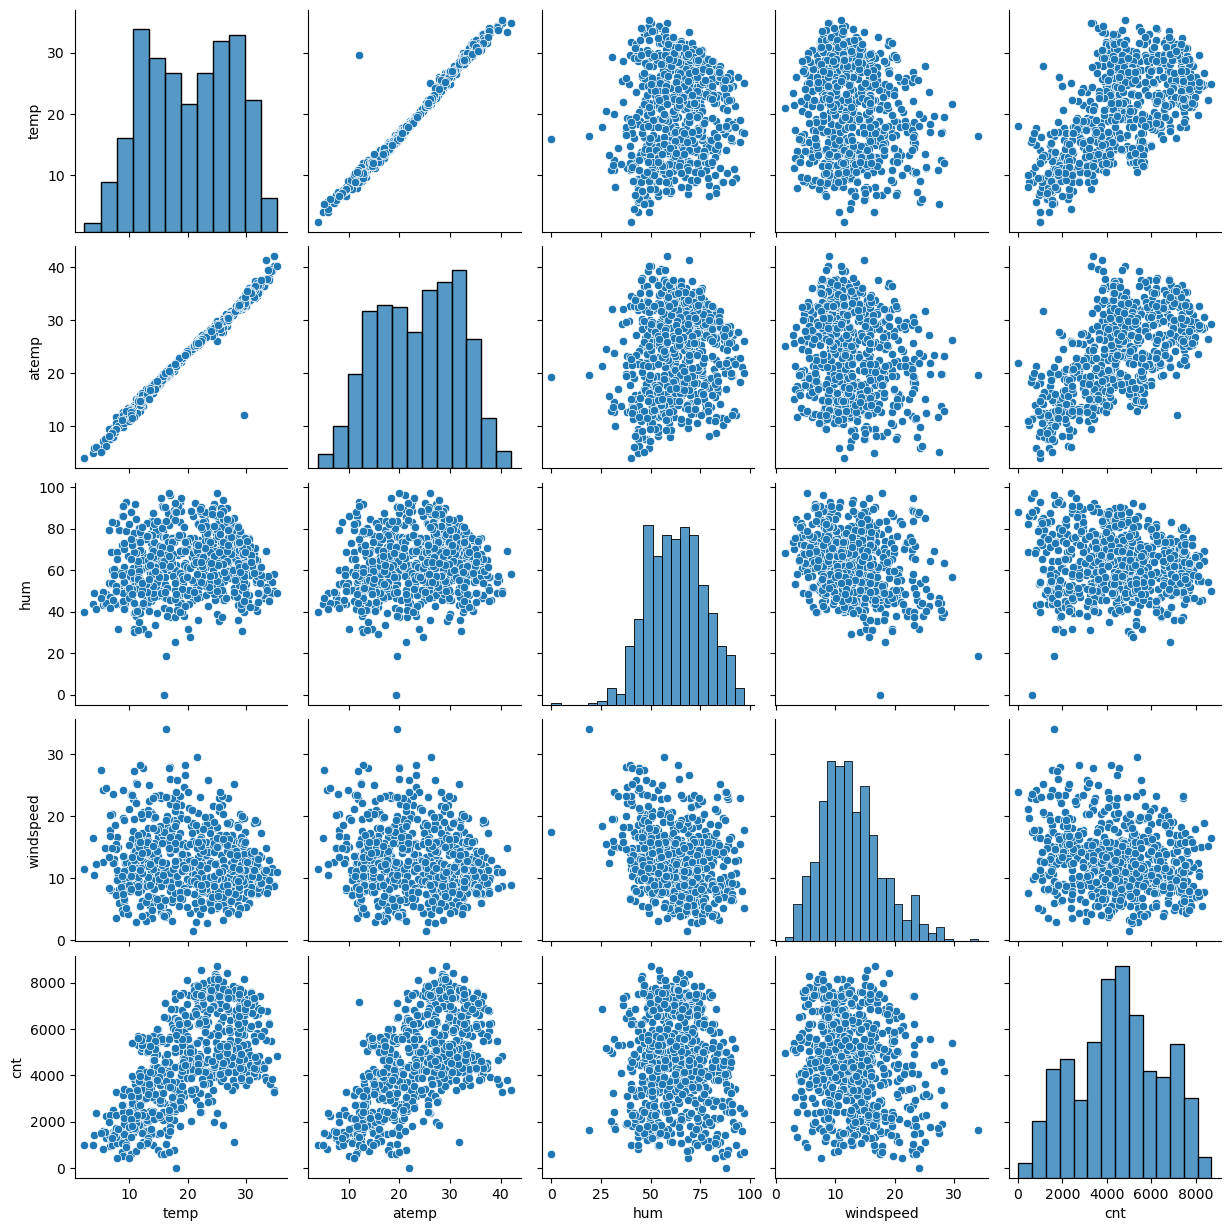

In [98]:
# Creating pairplot for continuous variables
columns = Bshare[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
plt.figure(figsize=(16, 8))
sns.pairplot(columns)
plt.show()


## Data Preparation

- We are mapping 'season' that has more than 2 levels as follows:

    A. 1:spring
    
    B. 2:summer
    
    C. 3:fall
    
    D. 4:winter

In [99]:
# Mapping 'season' into categorical variable
def binary_map(x):
    return x.map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
varlist = ['season']
Bshare[varlist] = Bshare[varlist].apply(binary_map)
Bshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


- Now we are mapping our "weathersit" variable that is having more than two levels into Categorical Variables as follows:

1: Clear, Few clouds, Partly cloudy, Partly cloudy = clear

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Few clouds

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = Scattered Clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Thunderstorm

In [100]:

def binary_map(x):
    return x.map({1: "clear", 2: "Few clouds", 3: "Scattered Clouds", 4: "Thunderstorm"})
varlist = ['weathersit']
Bshare[varlist] = Bshare[varlist].apply(binary_map)
Bshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Few clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Few clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [101]:
# Mapping weekday to categorical variable

def binary_map(x):
    return x.map({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5:"Fri", 6:"Sat"})
varlist = ['weekday']
Bshare[varlist] = Bshare[varlist].apply(binary_map)
Bshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Sat,0,Few clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sun,0,Few clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [102]:
# Mapping mnth to categorical variable

def binary_map(x):
    return x.map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sept", 10:"Oct", 11:"Nov", 12:"Dec"})
varlist = ['mnth']
Bshare[varlist] = Bshare[varlist].apply(binary_map)
Bshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Few clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Few clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


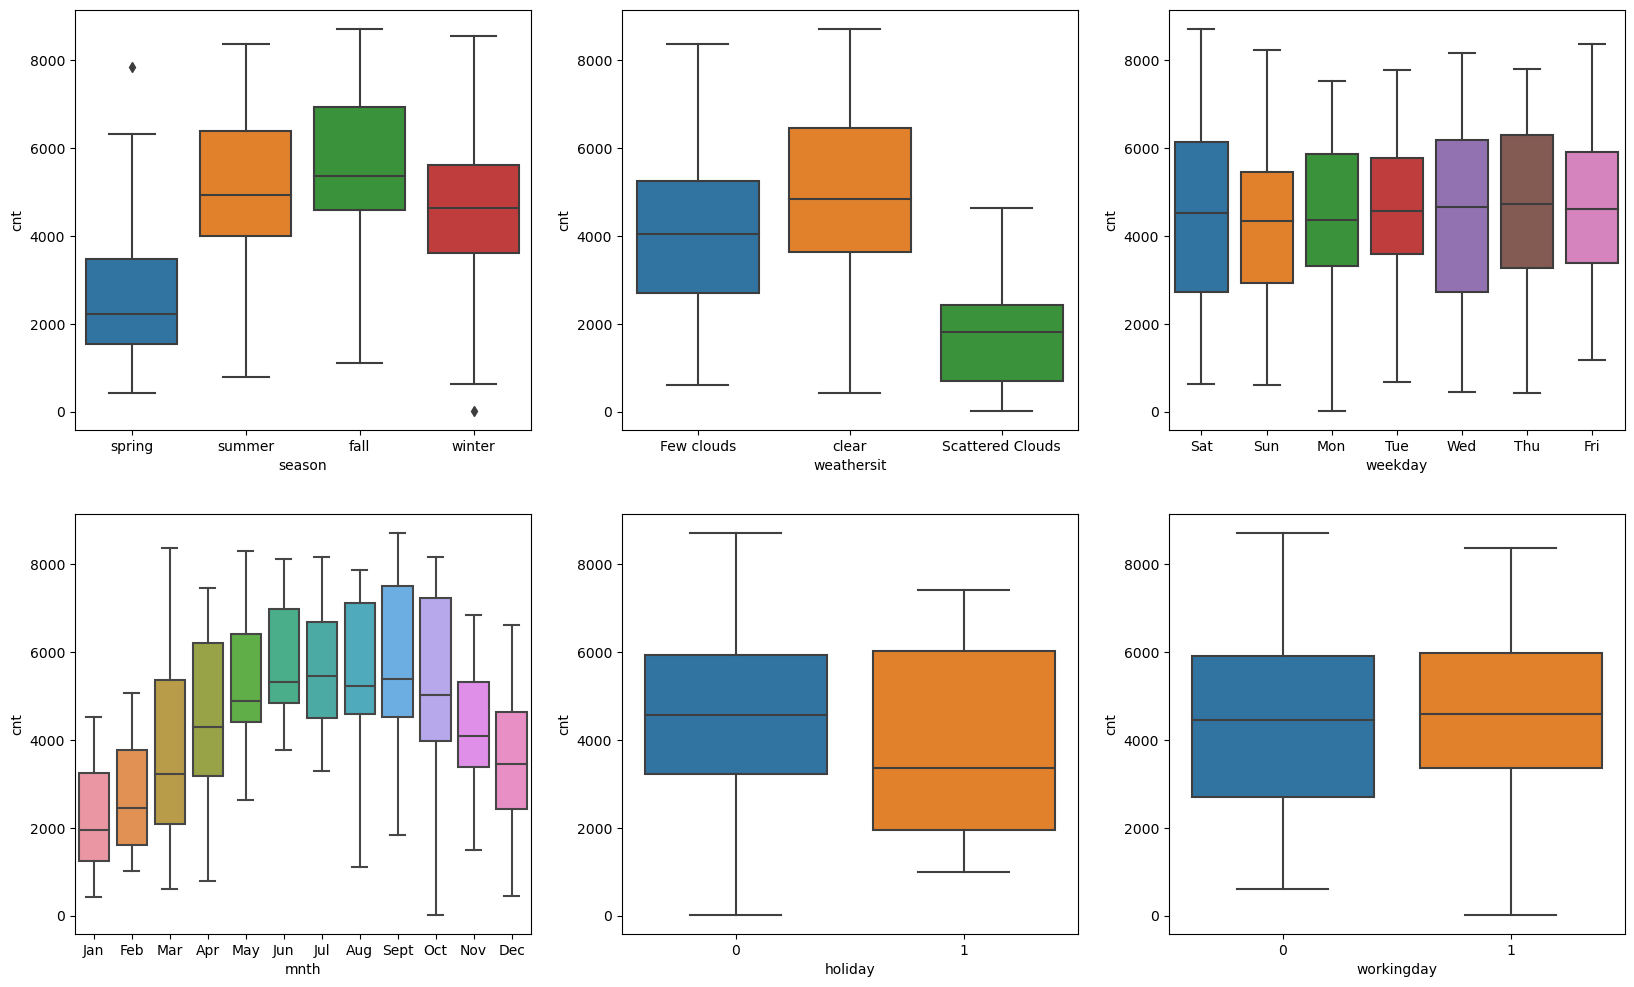

In [103]:
# BoxPlot for all Categorical Variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bshare)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bshare)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bshare)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bshare)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bshare)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bshare)
plt.show()

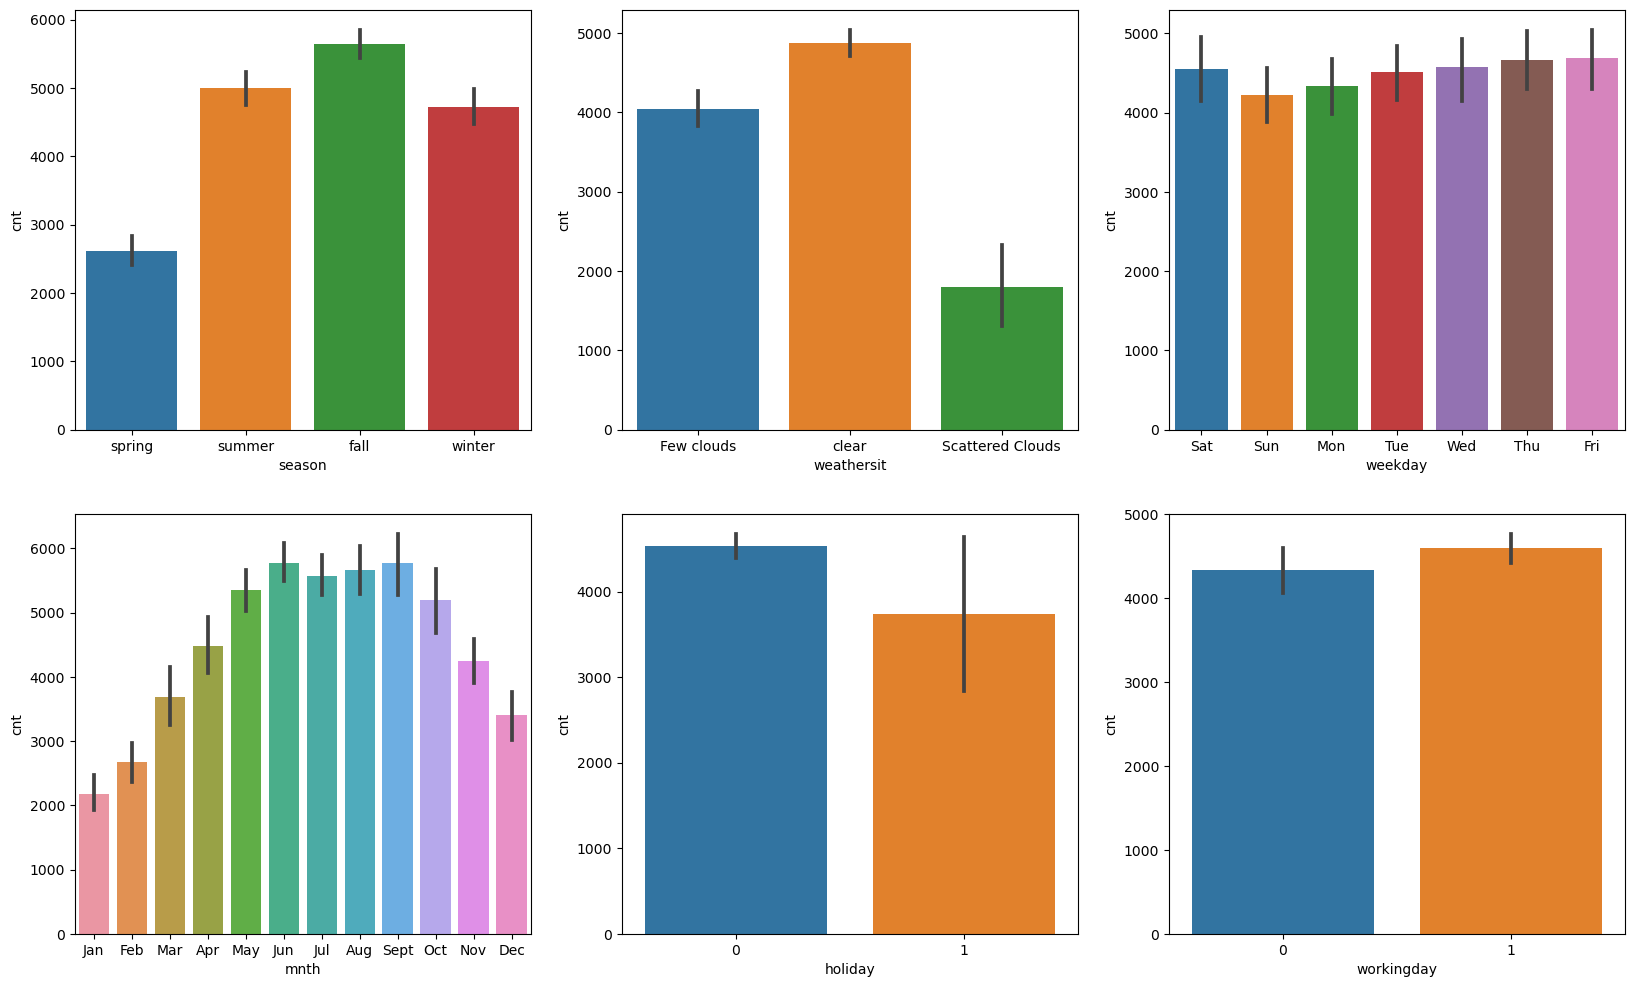

In [104]:
# BarPlot for all Categorical Variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'season', y = 'cnt', data = Bshare)
plt.subplot(2,3,2)
sns.barplot(x = 'weathersit', y = 'cnt', data = Bshare)
plt.subplot(2,3,3)
sns.barplot(x = 'weekday', y = 'cnt', data = Bshare)
plt.subplot(2,3,4)
sns.barplot(x = 'mnth', y = 'cnt', data = Bshare)
plt.subplot(2,3,5)
sns.barplot(x = 'holiday', y = 'cnt', data = Bshare)
plt.subplot(2,3,6)
sns.barplot(x = 'workingday', y = 'cnt', data = Bshare)
plt.show()

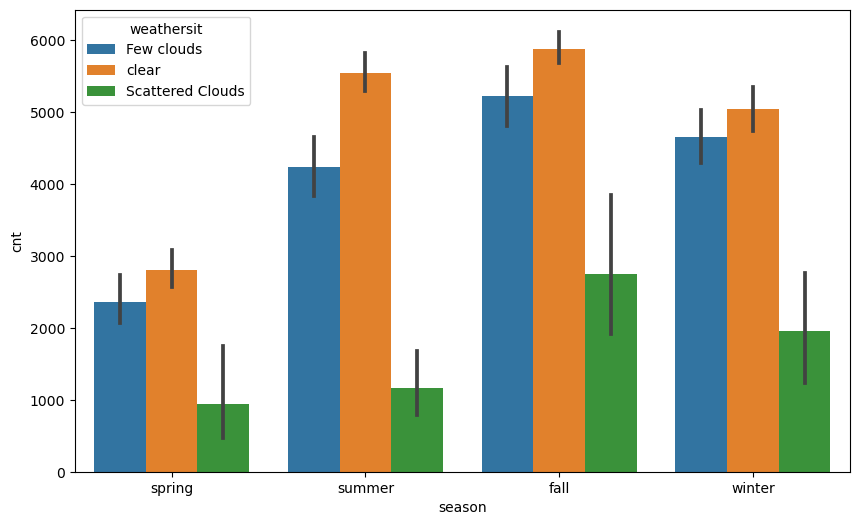

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'season', y = 'cnt', hue = 'weathersit', data = Bshare)
plt.show()

## Dummy Variables

- As we know that 'season','mnth','weekday'and 'weathersit' are having more than two levels so we need to create dummy variables for them.

In [106]:
# Adding Dummy Variable for 'season'
season_new = pd.get_dummies(Bshare['season'])
season_new.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now We don't need three variables right now.

- if 100 will be there then season = spring
- if 010 will be there then season = summer
- if 001 will be there then season = winter
- if 000 will be there then season = fall

In [107]:
# So we are dropping first column
season_new = pd.get_dummies(Bshare['season'], drop_first = True)
# Adding those dummy variable  in the dataset
Bshare = pd.concat([Bshare, season_new], axis = 1)
Bshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Few clouds,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Sun,0,Few clouds,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [108]:
# Adding Dummy Variable for 'weathersit'
weathersit_new = pd.get_dummies(Bshare['weathersit'])
weathersit_new.head()

,Few clouds,Scattered Clouds,clear
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


from above we can see that, we only need two variables. the logic behind this is:

- 10 will correspond to Scattered Clouds.
- 01 will correspond few clouds.
- 00 will correspond to clear. (if there will be no scattered cloud and no few clouds, It will be clear)

In [109]:
# So we are dropping first column
weathersit_new.drop(['clear'], axis = 1, inplace = True)
# Adding those dummy variable  in the dataset
Bshare = pd.concat([Bshare, weathersit_new], axis = 1)
Bshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Few clouds,Scattered Clouds
0,spring,0,Jan,0,Sat,0,Few clouds,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,spring,0,Jan,0,Sun,0,Few clouds,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [110]:
# Adding Dummy Variable for 'weekday'
weekday_new = pd.get_dummies(Bshare['weekday'])
weekday_new.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


We only need 6 variables. the logic is:

- 100000 : Mon
- 010000 : Tue
- 001000 : Wed
- 000100 : Thu
- 000010 : Fri
- 000001 : Sat
- 000000 : Sun (if all the weekday will be zero then it will be sunday)
    

In [111]:
# So we are dropping first column
weekday_new = pd.get_dummies(Bshare['weekday'], drop_first = True)
# Adding those dummy variable  in the dataset
Bshare = pd.concat([Bshare, weekday_new], axis = 1)
Bshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,Few clouds,Scattered Clouds,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Sat,0,Few clouds,14.110847,18.18125,80.5833,...,0,0,1,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,Few clouds,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [112]:
# Adding Dummy Variable for 'mnth'
mnth_new = pd.get_dummies(Bshare['mnth'])
mnth_new.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [113]:
# dropping first column
mnth_new = pd.get_dummies(Bshare['mnth'], drop_first = True)
# Adding those dummy variable  in the dataset
Bshare = pd.concat([Bshare, mnth_new], axis = 1)
Bshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,spring,0,Jan,0,Sat,0,Few clouds,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,Few clouds,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [114]:
# Drop 'weathersit', 'mnth', 'weekday' and 'season' variable as we have created the dummies for it
Bshare.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1, inplace = True)
Bshare.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [115]:
Bshare.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the Data into Training and Testing

In [116]:
np.random.seed(0)
df_train, df_test = train_test_split(Bshare, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling of Features

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [118]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


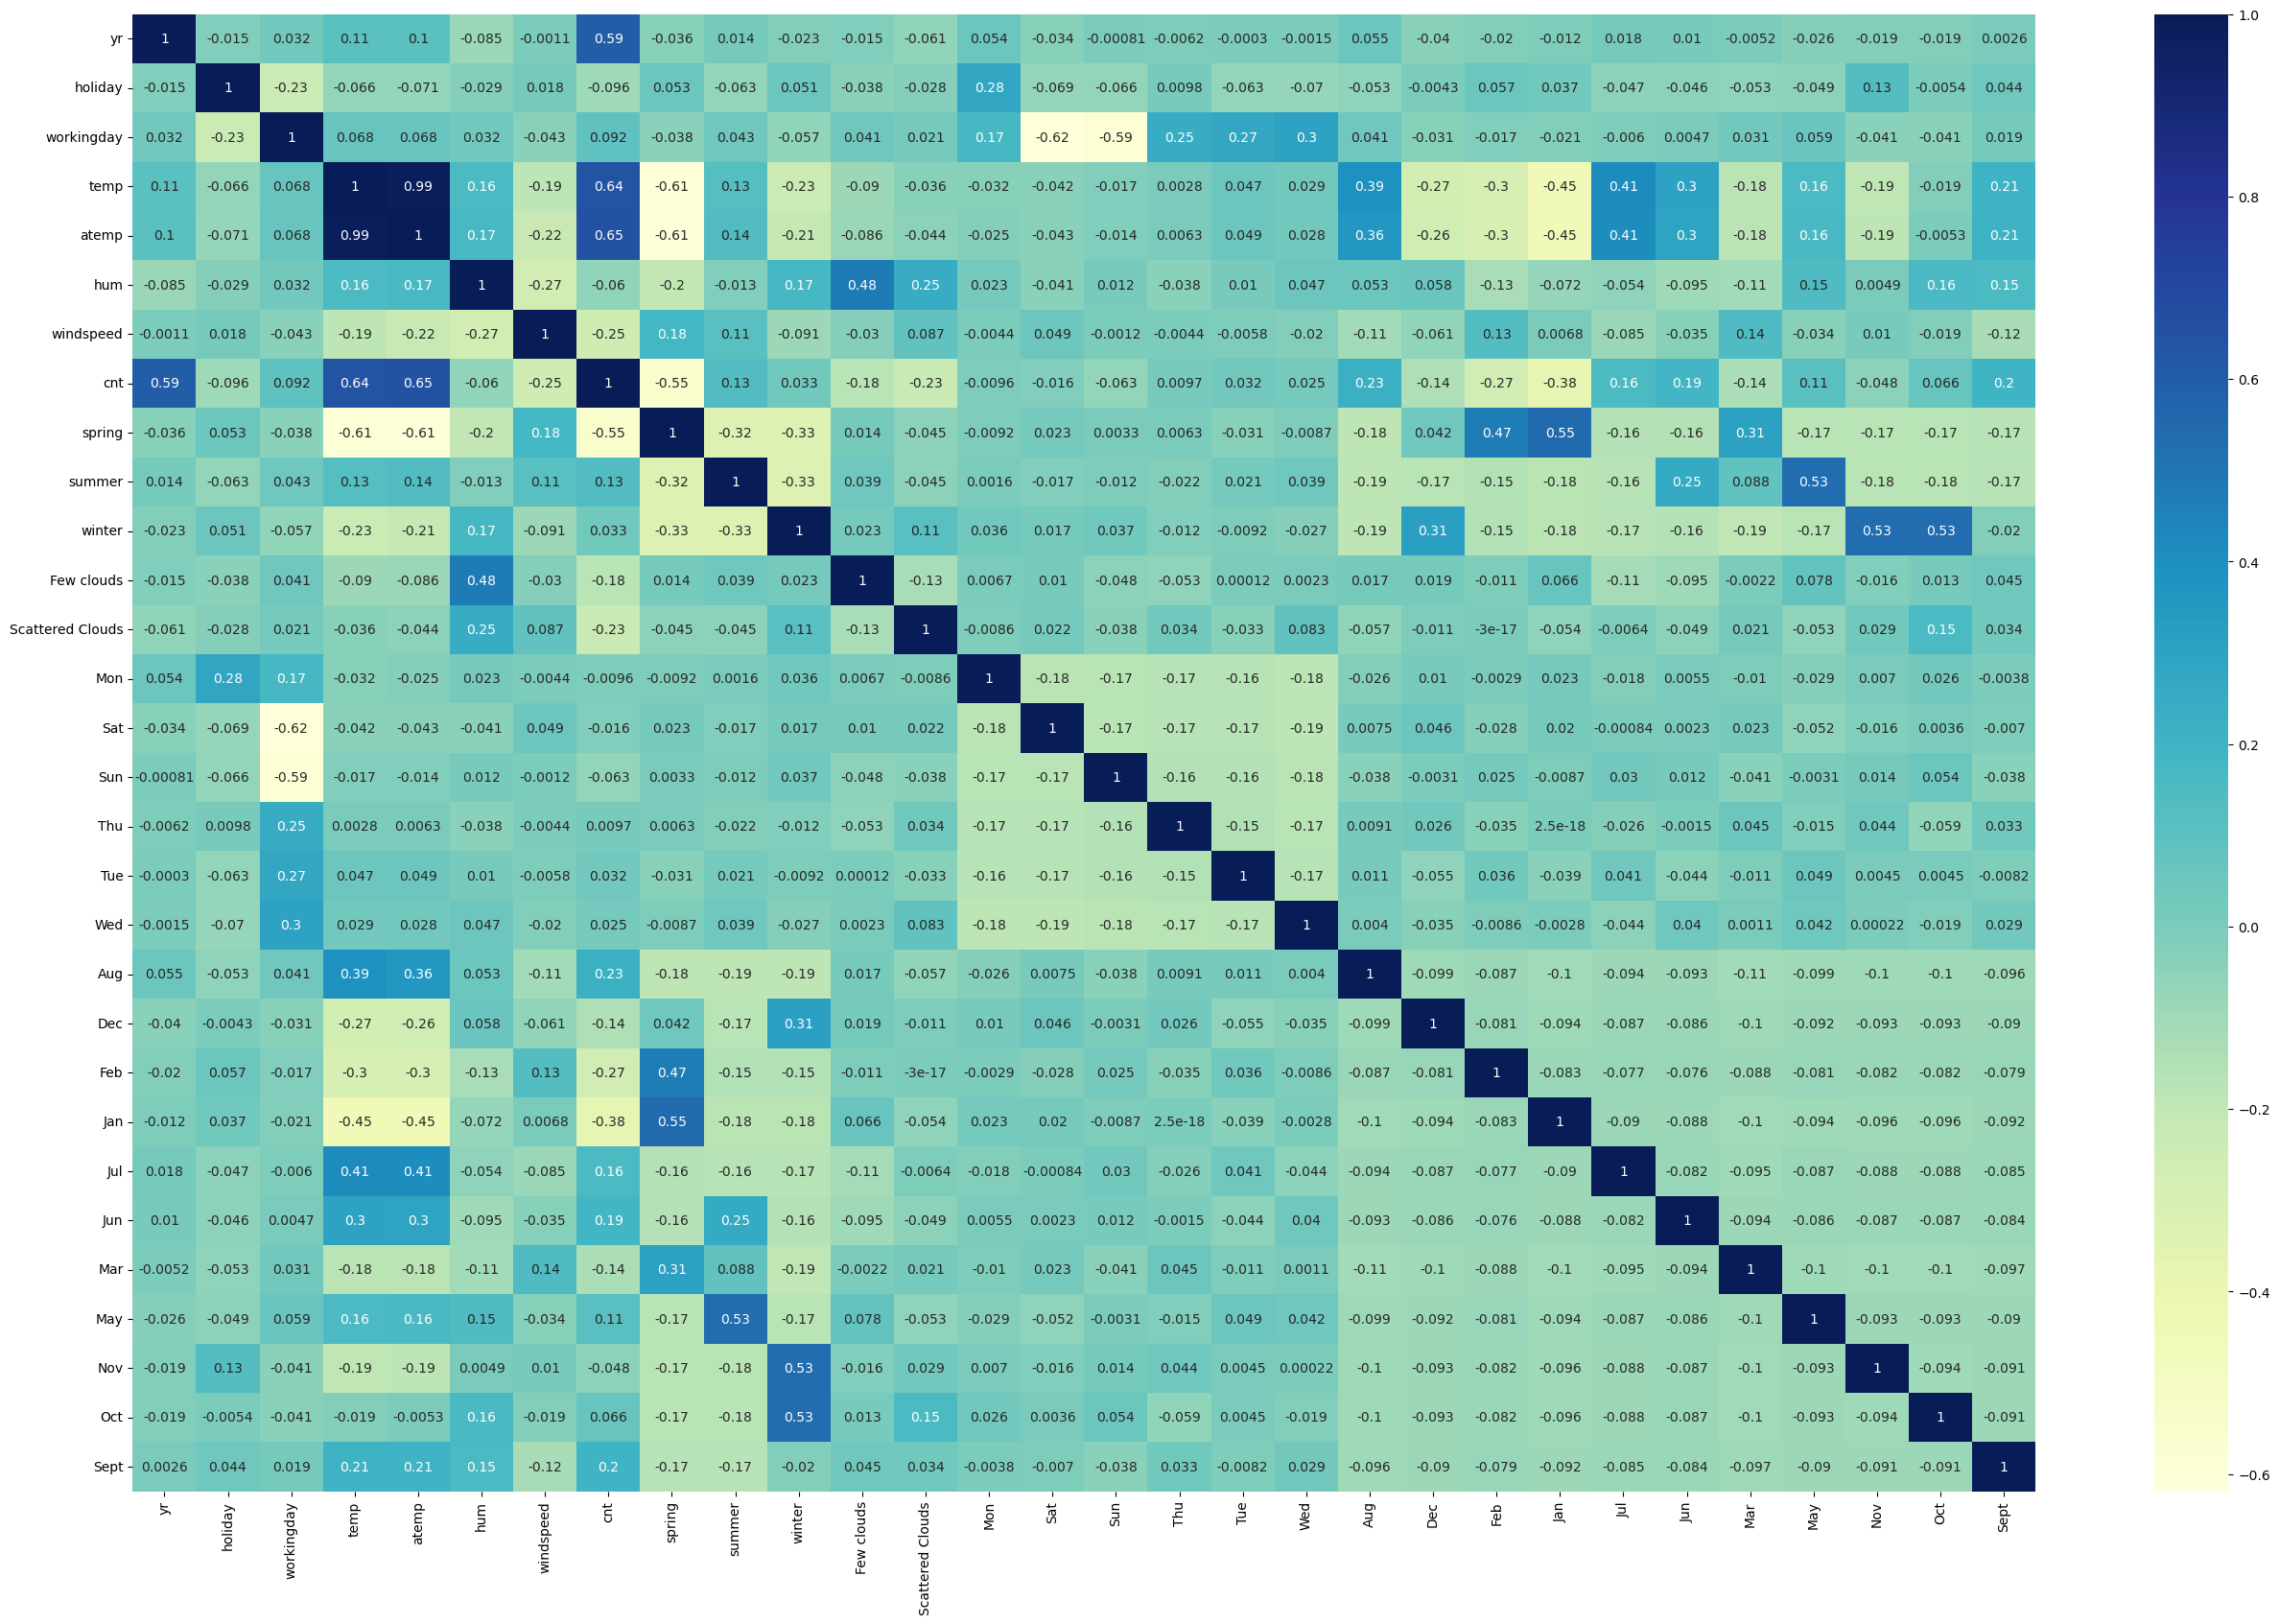

In [119]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (32, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [120]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model using Recursive feature elimination (RFE)


In [121]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [122]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)



In [123]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Few clouds', True, 1),
 ('Scattered Clouds', True, 1),
 ('Mon', False, 2),
 ('Sat', False, 2),
 ('Sun', False, 2),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sept', True, 1)]

In [124]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Few clouds', 'Scattered Clouds', 'Dec', 'Jan', 'Nov',
       'Sept'],
      dtype='object')

In [125]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug',
       'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [126]:
X_train_new = X_train[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Few clouds', 'Scattered Clouds', 'Dec', 'Jan', 'Nov',
       'Sept']]

In [127]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)

In [128]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [129]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          3.28e-185
Time:                        01:28:13   Log-Likelihood:                 502.46
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3748      0.032  

In [130]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,atemp,351.98
2,temp,349.13
4,hum,24.11
5,windspeed,4.12
7,winter,2.99
6,spring,2.93
8,Few clouds,2.26
0,yr,2.06
12,Nov,1.82
11,Jan,1.73


#### Dropping 'atemp' as it is having highest VIF and also It was having highest P-Value

In [131]:
X_train_new2 = X_train_new.drop(['atemp'], axis =1)

### Again Building the model

In [132]:
# Adding a constant variable  
X_train_rfe2 = sm.add_constant(X_train_new2)

In [133]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [134]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.80e-186
Time:                        01:28:13   Log-Likelihood:                 502.25
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3763      0.032  

In [135]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.57
2,temp,14.20
4,windspeed,4.03
6,winter,2.97
5,spring,2.93
7,Few clouds,2.26
0,yr,2.06
11,Nov,1.82
10,Jan,1.73
9,Dec,1.53


### Dropping "Nov" as it is having high p-value

In [136]:
X_train_new3 = X_train_new2.drop(['Nov'], axis =1)

In [139]:
# Adding a constant variable  
X_train_rfe3 = sm.add_constant(X_train_new3)

In [141]:
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.11e-185
Time:                        01:30:46   Log-Likelihood:                 498.05
No. Observations:                 510   AIC:                            -970.1
Df Residuals:                     497   BIC:                            -915.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3625      0.032  

In [138]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.31
2,temp,13.96
4,windspeed,4.00
5,spring,2.93
7,Few clouds,2.25
6,winter,2.22
0,yr,2.06
10,Jan,1.72
9,Dec,1.34
8,Scattered Clouds,1.22


### Dropping "Dec" that is having high p-value

In [142]:
X_train_new4 = X_train_new3.drop(['Dec'], axis =1)
# Adding a constant variable  
X_train_rfe4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.9
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          5.52e-186
Time:                        01:32:03   Log-Likelihood:                 495.95
No. Observations:                 510   AIC:                            -967.9
Df Residuals:                     498   BIC:                            -917.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3555      0.032  

In [143]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.41
2,temp,13.51
4,windspeed,3.99
5,spring,2.90
7,Few clouds,2.23
6,winter,2.11
0,yr,2.06
9,Jan,1.65
8,Scattered Clouds,1.21
10,Sept,1.16


### Dropping "Jan" that is having high p-value

In [144]:
X_train_new5 = X_train_new4.drop(['Jan'], axis =1)
# Adding a constant variable  
X_train_rfe5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          8.65e-186
Time:                        01:34:04   Log-Likelihood:                 492.63
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     499   BIC:                            -916.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3438      0.032  

In [145]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,21.66
2,temp,13.05
4,windspeed,3.97
5,spring,2.52
7,Few clouds,2.23
6,winter,2.09
0,yr,2.05
8,Scattered Clouds,1.20
9,Sept,1.16
1,holiday,1.04


### Dropping "hum" as it is having highest VIF

In [156]:
X_train_new6 = X_train_new5.drop(['hum'], axis =1)
final_column = X_train_new6.columns
final_column
# Adding a constant variable  
X_train_rfe6 = sm.add_constant(X_train_new6)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          3.31e-184
Time:                        01:46:55   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     500   BIC:                            -909.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2671      0.024  

In [148]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.94
2,temp,3.75
0,yr,2.05
4,spring,1.65
6,Few clouds,1.50
5,winter,1.37
8,Sept,1.16
7,Scattered Clouds,1.08
1,holiday,1.04


### All the features are having VIF less than 5.0 and p-value as 0. 

## Adjusted R2 = 0.824

# Residual Analysis of the train data

In [150]:
y_train_pred = lm6.predict(X_train_rfe6)

In [151]:
res = y_train - y_train_pred

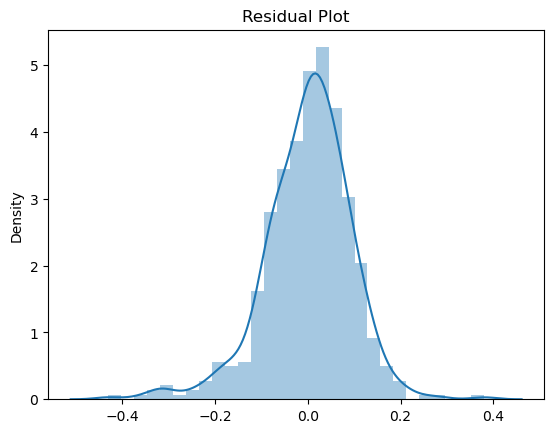

In [152]:
# Plot the histogram of the error terms
# plot residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

## Making Predictions

### Applying the scaling on the test sets

In [158]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [160]:
y_test = df_test.pop('cnt')
X_test = df_test

In [161]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [163]:
# Making predictions
y_pred = lm6.predict(X_test_new)

Text(0, 0.5, 'y_pred')

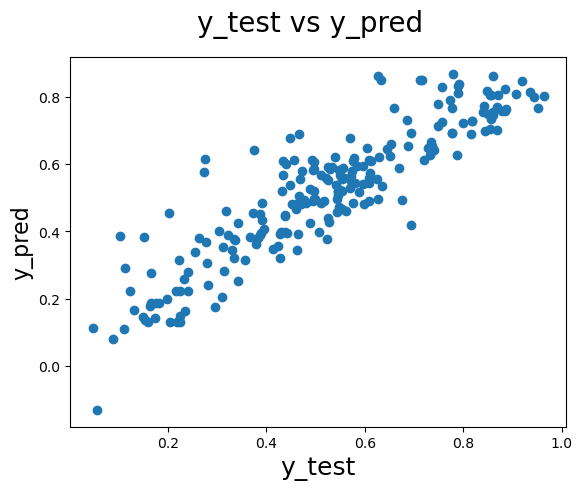

In [164]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [165]:
r2_score_test = r2_score(y_true = y_test, y_pred = y_pred)
r2_score_test

0.8041402474517902

### So our Model is having r2 score as 0.824 for training set and 0.804 for our test set.

#### Equation of our Model will be :

## (0.24 * yr) – (0.97 * holiday) + (0.41 * temp) – (0.14  * windspeed) – (0.12 * spring) + (0.05 * winter) – (0.08 * Few Clouds) – (0.29 * scattered clouds) + (0.07 * Sept)